In [176]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model


In [177]:
data_train = pd.read_csv('wk3_kc_house_train_data.csv')
data_valid = pd.read_csv('wk3_kc_house_valid_data.csv')
data_test = pd.read_csv('wk3_kc_house_test_data.csv')
data_set1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
data_set2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
data_set3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
data_set4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [178]:
data_train = data_train.sort_values(by='sqft_living', ascending=True)
data_valid = data_valid.sort_values(by='sqft_living', ascending=True)
data_test = data_test.sort_values(by='sqft_living', ascending=True)

In [179]:
def polynomial_dataframe(feature, degree):
    ploy_df = pd.DataFrame()
    for power_num in range(degree):
        ploy_df[power_num+1] = np.power(feature, power_num+1)
    return ploy_df

In [180]:
def train_function(data_train, degree):
    poly_data_train = polynomial_dataframe(data_train['sqft_living'], degree)
    poly_data_train['price'] = data_train['price']
    input_name = np.arange(1,degree+1)
    x_input = poly_data_train[input_name].values.reshape(-1,degree)
    y_input = poly_data_train['price'].values.reshape(-1,1)
    
    reg1 = sklearn.linear_model.LinearRegression()
    reg1.fit(x_input, y_input)
#     print( reg1.coef_, reg1.intercept_ )
    
#     reg2 = sklearn.linear_model.Ridge(alpha=1.5e-5, normalize=True)
#     reg2.fit(x_input, y_input)
#     print( reg2.coef_, reg2.intercept_ )

    reg2 = sklearn.linear_model.Ridge(alpha=1.23e2, normalize=True)
    reg2.fit(x_input, y_input)
    print( reg2.coef_, reg2.intercept_ )

    
    predict1 = reg1.predict(x_input)
    predict2 = reg2.predict(x_input)
    rss1 = len(y_input)*sklearn.metrics.mean_squared_error(y_input, predict1)
    plt.plot(poly_data_train[1].values, y_input, '.')
    plt.plot(poly_data_train[1].values, predict1, 'k-', label='reg1')
    plt.plot(poly_data_train[1].values, predict2, '-', label='reg2')
    plt.legend()
    plt.show()
    return 

[[ 2.33302293e+00  3.56038341e-04  3.37288360e-08  2.06040887e-12
   1.36746708e-15 -1.92341983e-17  1.04834390e-17 -9.30269146e-18
  -8.46418543e-18 -1.59248399e-17  9.41566963e-18  1.22423043e-18
   5.91820334e-18 -1.47750360e-17 -2.35836923e-17]] [538993.05747682]


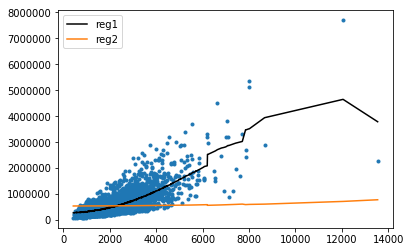

In [46]:
train_function(data_set1, 15)

[[ 2.10772269e+00  3.94453401e-04  6.78444742e-08  9.15014451e-12
   1.94720746e-15 -2.53164281e-17  1.02334725e-17 -4.38033903e-18
  -7.39193953e-18 -1.03274762e-18  8.33154295e-18  4.90077187e-18
  -3.58306755e-18 -1.75676068e-17 -1.57687979e-17]] [529947.12444266]


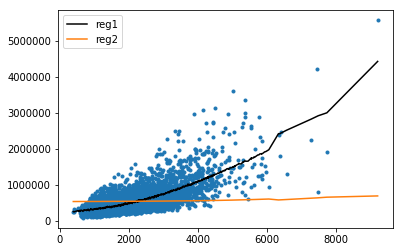

In [47]:
train_function(data_set2, 15)

[[ 2.31123641e+00  4.20062138e-04  6.28136039e-08  6.89987701e-12
   1.20756329e-15 -1.89793802e-17  5.95314134e-18 -8.07909989e-18
  -5.49082928e-18 -1.34742751e-17  2.35169643e-18 -4.76775704e-18
  -1.73049455e-17 -1.11975184e-17 -3.04976179e-17]] [533849.96743886]


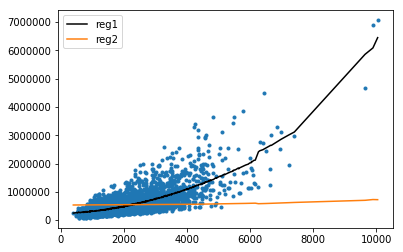

In [48]:
train_function(data_set3, 15)

[[ 2.10018378e+00  4.09722690e-04  7.60925093e-08  1.16346493e-11
   2.52725095e-15 -3.60823239e-17  1.34459584e-17 -1.42653353e-18
  -1.20066039e-17 -7.79542974e-18  1.44429140e-17 -7.79955285e-18
  -2.56592299e-18 -2.15123845e-17 -2.67990091e-17]] [524791.11127526]


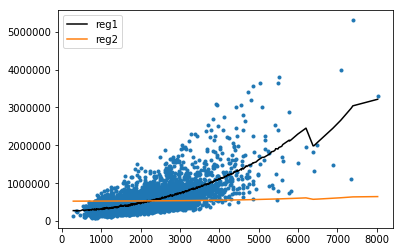

In [49]:
train_function(data_set4, 15)

fit 15 个特征， alpha=1e-9，四种情况各不相同，这是方差大的表现。

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large.

In [86]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv')
train_valid_shuffled.shape

(19396, 21)

In [87]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)
9761+9635

(9761, 21)
(9635, 21)
(2217, 21)


19396

In [113]:
train_valid_shuffled.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4,2.50,2800,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000.0,3,2.50,2490,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000.0,3,1.75,2340,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,475000510,20141118T000000,594000.0,3,1.00,1320,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,844001052,20150128T000000,365000.0,4,2.50,1904,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426


In [109]:
last = polynomial_dataframe(train_valid_shuffled['sqft_living'],15)

In [114]:
last.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2800,7840000,21952000000,61465600000000,172103680000000000,2274958083551657984,5755928514847047680,-5854478850414608384,6614700366887911424,629977281762164736,-6951042142055694336,-1602999992367185920,-5841168716699533312,6989586621679009792,-1152921504606846976
1,2490,6200100,15438249000,38441240010000,95718687624900000,-1468140772223171008,-3215196241204589952,48287390516420864,-8891606130078909952,-4006375445023841280,3813685767502637056,-3995636878852812800,-6340772614055550976,1889118097054253056,-15677130845552640
2,2340,5475600,12812904000,29982195360000,70158337142400000,-1850187750169964544,5545521924027596800,8460218406761725952,3554680732089843712,-1528664152773492736,1594232809680011264,4262471761896931328,-5504621038048116736,-4985865583326134272,-8583210398717575168
3,1320,1742400,2299968000,3035957760000,4007464243200000,5289852801024000000,-8710306584240062464,-5283133275831795712,-866664235759828992,-298658632982069248,-6847769988430823424,-151788611006627840,2553218282056318976,-5506033174506897408,53374692458758144
4,1904,3625216,6902411264,13142191046656,25022731752833024,-7696950963734577152,-8279840425250914304,7150013343925796864,-71719562931863552,-7426839306301341696,7950665337471500288,-6710081969805328384,7597572571374026752,3530822107858468864,8070450532247928832


In [116]:
last.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2800,7840000,21952000000,61465600000000,172103680000000000,2274958083551657984,5755928514847047680,-5854478850414608384,6614700366887911424,629977281762164736,-6951042142055694336,-1602999992367185920,-5841168716699533312,6989586621679009792,-1152921504606846976
1,2490,6200100,15438249000,38441240010000,95718687624900000,-1468140772223171008,-3215196241204589952,48287390516420864,-8891606130078909952,-4006375445023841280,3813685767502637056,-3995636878852812800,-6340772614055550976,1889118097054253056,-15677130845552640
2,2340,5475600,12812904000,29982195360000,70158337142400000,-1850187750169964544,5545521924027596800,8460218406761725952,3554680732089843712,-1528664152773492736,1594232809680011264,4262471761896931328,-5504621038048116736,-4985865583326134272,-8583210398717575168
3,1320,1742400,2299968000,3035957760000,4007464243200000,5289852801024000000,-8710306584240062464,-5283133275831795712,-866664235759828992,-298658632982069248,-6847769988430823424,-151788611006627840,2553218282056318976,-5506033174506897408,53374692458758144
4,1904,3625216,6902411264,13142191046656,25022731752833024,-7696950963734577152,-8279840425250914304,7150013343925796864,-71719562931863552,-7426839306301341696,7950665337471500288,-6710081969805328384,7597572571374026752,3530822107858468864,8070450532247928832


In [124]:
last[0:0].append(last[1939:1942]).values

array([[                1800,              3240000,           5832000000,
              10497600000000,    18895680000000000, -2881264147419103232,
        -2740380642001813504, -7404487922814025728,  8917704226759507968,
         3200264039804436480,  5091120650605559808, -4014633543639498752,
         4783298343046479872, -4692464938696835072,  2171896104671510528],
       [                2890,              8352100,          24137569000,
              69757574410000,   201599390044900000, -7673573128944651712,
        -3639966051162405248, -4857765844906745600,  -971051687526004224,
        -2434277746300361728, -6853194724706228224,  6070380763058868224,
          546791142345580544, -6193588960293666816, -6130343750432030720],
       [                2740,              7507600,          20570824000,
              56364057760000,   154437518262400000, -1116313656343687168,
         3460097854082727936,  -958333700034985984, -6396679629105266688,
        -2495313724356689920,  65824

In [166]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
last = polynomial_dataframe(train_valid_shuffled['sqft_living'],15)

for lamda in np.power(10,np.linspace(3,9,13)):
    rss_list = []
    for i in range(k):
        start = int( (n*i)/k )
        end   = int( (n*(i+1))/k-1 ) + 1
    #     print( i, (start, end) ,len(last[start:end]))
        x_vaild = last[start:end].values
        y_vaild = train_valid_shuffled['price'][start:end].values
        
        x_train = last[0:start].append(last[end:n]).values
        y_train = train_valid_shuffled['price'][0:start].append(train_valid_shuffled['price'][end:n]).values
        
        reg = sklearn.linear_model.Ridge(alpha=lamda, normalize=True)
        reg.fit(x_train, y_train)
    #     print( reg.coef_, reg.intercept_ )
        
        predict = reg.predict(x_vaild)
        rss = len(y_vaild)*sklearn.metrics.mean_squared_error(y_vaild, predict)
    #     print(rss)
        rss_list.append(rss)
    print('mes:', np.mean(rss_list), '\tlamda:', lamda)
#     print()

mes: 265112635027120.25 	lamda: 1000.0
mes: 265740379779639.75 	lamda: 3162.2776601683795
mes: 265939850773897.34 	lamda: 10000.0
mes: 266003025551996.1 	lamda: 31622.776601683792
mes: 266023012836160.44 	lamda: 100000.0
mes: 266029334337348.7 	lamda: 316227.7660168379
mes: 266031333468258.2 	lamda: 1000000.0
mes: 266031965658631.3 	lamda: 3162277.6601683795
mes: 266032165575747.84 	lamda: 10000000.0
mes: 266032228795187.7 	lamda: 31622776.60168379
mes: 266032248786939.6 	lamda: 100000000.0
mes: 266032255108887.6 	lamda: 316227766.01683795
mes: 266032257108063.2 	lamda: 1000000000.0


In [159]:
print(np.linspace(3,9,13))
np.power(10,np.linspace(3,9,13))

[3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9. ]


array([1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07, 3.16227766e+07, 1.00000000e+08, 3.16227766e+08,
       1.00000000e+09])

In [172]:
lastt1 = polynomial_dataframe(data_train['sqft_living'],15)
lastt2 = polynomial_dataframe(data_test['sqft_living'],15)

In [174]:
x_train = lastt1.values
y_train = data_train['price'].values
x_test = lastt2.values
y_test = data_test['price'].values

reg = sklearn.linear_model.Ridge(alpha=1000, normalize=True)
reg.fit(x_train, y_train)

predict = reg.predict(x_test)
rss = len(y_test)*sklearn.metrics.mean_squared_error(y_test, predict)
rss

283706518061282.5

2.8*10^14

3th:

-100~1000,no